In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Questins

# 1. What share of developers is contributing?

# 2. Who contributes the most to open source? 
# - country
# - employment status

# 3. Is contribution to Open Source important for hiring decision? Is there any bias among those that contribute to Open Source

# 4. How Open Source contribution impacts salary and career satisfaction? 

In [3]:
# 1. What share of developers is contributing?

# - get unique values in column ProgramHobby
print(df.ProgramHobby.unique())

#subset respondents to a dataframe that contribute to Open Source 
df_OpSr = df[df['ProgramHobby'] == ('Yes, I contribute to open source projects' and 'Yes, both')]
df_OpSr.head()

#subset respondents to a dataframe that do not contribute to Open Source

df_not_OpSr = df[df['ProgramHobby'] != ('Yes, I contribute to open source projects' and 'Yes, both')]
df_not_OpSr.head()

['Yes, both' 'Yes, I program as a hobby' 'No'
 'Yes, I contribute to open source projects']


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Strongly disagree,Female,"Some college/university study, no bachelor's d...",White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN
11,12,Professional developer,No,Canada,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,100 to 499 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# share of respondents that contribute to open source 
num_rows_all = df.shape[0]
num_rows_df_OpSr = df_OpSr.shape[0]
share_OpSr = f"{(num_rows_df_OpSr/num_rows_all):.0%}"
print(num_rows_all, num_rows_df_OpSr, share_OpSr)

#Share of Users contributing to open source is 26% across all respondents

19102 5033 26%


                    countries: open source  countries: all
United States                     0.239022        0.228458
India                             0.093582        0.081510
Germany                           0.076296        0.069993
United Kingdom                    0.067952        0.074547
Canada                            0.037552        0.045754
Poland                            0.034572        0.036331
France                            0.028214        0.027327
Netherlands                       0.024836        0.019527
Australia                         0.020664        0.020888
Russian Federation                0.018279        0.017276
Switzerland                       0.016491        0.012669
Italy                             0.016491        0.015915
Israel                            0.016094        0.017694
Brazil                            0.015498        0.013559
Spain                             0.014703        0.016333


<AxesSubplot:>

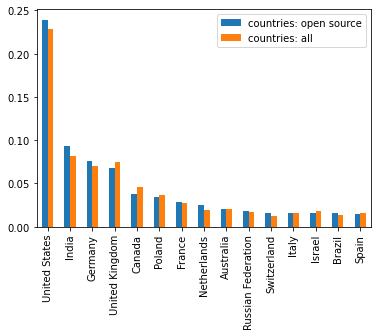

In [5]:
# 2. Countries distribution

# share of respondents that contribute to open source per country
df_OpSr_country = df_OpSr.Country.value_counts(normalize=True)
df_country = df.Country.value_counts(normalize=True)
df_country_share = pd.concat([df_OpSr_country, df_country], axis = 1)
df_country_share.columns = ['countries: open source', 'countries: all']
print(df_country_share.head(15))

df_country_share.head(15).plot(kind = "bar")

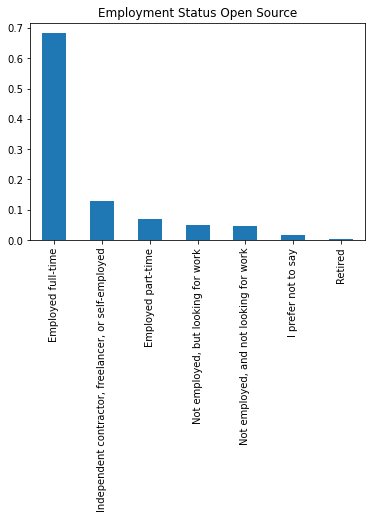

In [6]:
#3. Employment status of open source contributors
emp_vals_OpSr = df_OpSr.EmploymentStatus.value_counts()

(emp_vals_OpSr/df_OpSr.shape[0]).plot(kind="bar");
plt.title("Employment Status Open Source");

In [8]:
# comparison of employments status for all respondents and theose contributing to open source
df_OpSr_emp = df_OpSr.EmploymentStatus.value_counts(normalize=True)
df_emp = df.EmploymentStatus.value_counts(normalize=True)
df_emp_share = pd.concat([df_OpSr_emp, df_emp], axis = 1)
df_emp_share.columns = ['employment: open source', 'employment: all']
print(df_emp_share)


                                                    employment: open source  \
Employed full-time                                                 0.683290   
Independent contractor, freelancer, or self-emp...                 0.129942   
Employed part-time                                                 0.067952   
Not employed, but looking for work                                 0.050467   
Not employed, and not looking for work                             0.047685   
I prefer not to say                                                0.017683   
Retired                                                            0.002980   

                                                    employment: all  
Employed full-time                                         0.714847  
Independent contractor, freelancer, or self-emp...         0.097686  
Employed part-time                                         0.061145  
Not employed, but looking for work                         0.047430  
Not employed, and

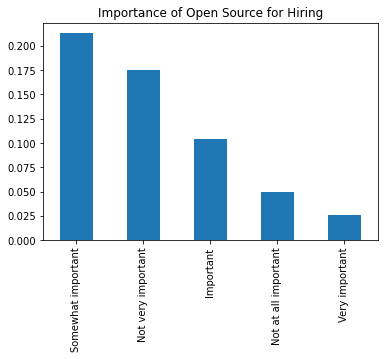

In [9]:
#4.How important is Open Source for hiring?
hiring_vals = df.ImportantHiringOpenSource.value_counts()

(hiring_vals/df.shape[0]).plot(kind="bar");
plt.title("Importance of Open Source for Hiring");

                      hiring: open source  hiring: not open source
Somewhat important               0.413946                 0.360676
Important                        0.263265                 0.153332
Not very important               0.207823                 0.345911
Very important                   0.078231                 0.033821
Not at all important             0.036735                 0.106259


<AxesSubplot:>

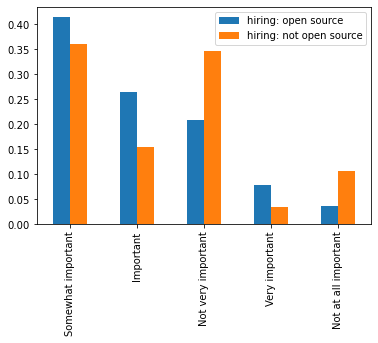

In [13]:
# Bias: comparing importance of those that contribute and do not contribute
df_OpSr_hiring = df_OpSr.ImportantHiringOpenSource.value_counts(normalize=True)
df_hiring_not_OpSr = df_not_OpSr.ImportantHiringOpenSource.value_counts(normalize=True)
df_hiring_share_OSvsnotOS = pd.concat([df_OpSr_hiring, df_hiring_not_OpSr], axis = 1)
df_hiring_share_OSvsnotOS.columns = ['hiring: open source', 'hiring: not open source']
print(df_hiring_share_OSvsnotOS)
df_hiring_share_OSvsnotOS.plot(kind = "bar")

In [17]:
#4. How Open Source contribution impacts salary and career satisfaction?

# impact of Open Source on Career satisfaction
OpSr_carSat = df_OpSr['CareerSatisfaction'].mean()
not_OpSr_carSat = df_not_OpSr['CareerSatisfaction'].mean()
print("career satisfaction for open source: ", OpSr_carSat, ";", 
      "career satisfaction for not open source: ", not_OpSr_carSat,)


career satisfaction for open source:  7.57406127620364 ; career satisfaction for not open source:  7.25899158234844


In [20]:
# impact of Open Source on salary
OpSr_salary = df_OpSr['Salary'].mean()
not_OpSr_salary = df_not_OpSr['Salary'].mean()
print("salary for open source: ", OpSr_salary, ";", 
      "salary for not open source: ", not_OpSr_salary,";",
      "difference: ",(OpSr_salary - not_OpSr_salary))

salary for open source:  63438.60923086916 ; salary for not open source:  56460.766050370825 ; difference:  6977.843180498334
